Linear regression on stock market for prediction

In [209]:
import pandas as pd
import numpy as np
df=pd.read_csv("Stock Market data .csv")
pd.set_option('display.max_columns',100)
df.tail()

,Share,Category,Sector,RM,Up,Last Traded Price,Percentage Change,High Price,Low Price,% High Movt,% Low movt,Yearly Gainner,27th Dec,1st Feb,1st March,1st April,TB,RH,Corr,PeRatio,New Pe,W52_High,Corre,latest,Annual_Pat,Cum PAT 3 Quarter,Pat Jump,Annual Growth,Year End,Mar_17_ReportedPAT,Dec_16_ReportedPAT,Sep_16_ReportedPAT,Jun_16_ReportedPAT,Mar_16_ReportedPAT,Dec_15_ReportedPAT,Y oY PAT,LQ>0.5(4q's),PAT Growth,PeRatio.1,ResultDate,Mar_17_Inst_no_of_shares,Dec_16_Inst_no_of_shares,Int/ Incr/ Decr,Pledge,DividendYield,DERatio,FB,Mar_17_Eps_Before,Dec_16_Eps_Before,Sep_16_Eps_Before,Jun_16_Eps_Before,Mar_16_Eps_Before,Dec_15_Eps_Before,Annual_Eps,Volume,MarketCap,Annual_Pat.1,EquityCapital,FaceValue,New Listing,PE High Price High,Future,Cap Category
1557,ZODJRDMKJ,HWLV,JEWELLERY,NaN,NaN,32.65,NaN,NaN,NaN,NaN,NaN,2%,NaN,NaN,-10%,-6%,NaN,36.65,11%,25.04,17,41.40,21%,NaN,0.6255,0.5136,-0.1119,NaN,NaN,NaN,0.2476,0.2184,0.0476,0.1916,0.0799,Y,NaN,Y,25.04,42880.0,3.0,3.0,0.0,0.00,1.53,0.00,NaN,#REF!,0.48,0.42,0.09,0.37,0.15,1.21,0.003046,17,0.6255,5.1772,10,NaN,NaN,NaN,MiniCap
1558,ZUARI,TA,FERTILISERS,NaN,NaN,434.60,-3.32,439.90,418.60,0.012048193,0.038222647,168%,96%,33%,24%,20%,NaN,436.00,0%,0.00,20,449.95,3%,NaN,-87.4700,-4.2600,83.2100,G,NaN,NaN,22.4000,13.3900,-40.0500,-22.6400,1.6000,Y,NaN,Y,0.00,42874.0,62.0,60.0,2.0,0.00,0.00,6.90,NaN,#REF!,5.33,3.18,-9.52,-5.38,0.38,-21.64,7.412620,1828,-87.47,42.06,10,NaN,NaN,NaN,SmallCap
1559,ZUARIGLOB,HWLV,CHEMICALS,NaN,NaN,149.00,-3.02,149.95,144.50,0.006335445,0.031141869,49%,58%,32%,23%,17%,NaN,147.05,-1%,24.43,162,150.40,1%,NaN,-24.1200,17.8000,41.9200,NaN,NaN,NaN,0.6900,16.1300,0.9800,0.0600,4.2800,NaN,NaN,NaN,24.43,42874.0,46.0,47.0,-1.0,0.00,0.67,0.92,NaN,#REF!,0.23,5.48,0.33,0.02,1.45,-18.03,1.225012,439,-24.12,29.44,10,NaN,NaN,NaN,MiniCap
1560,ZYDUSWELL,HWLV,FMCG,#REF!,#REF!,866.10,-0.94,869.95,853.15,0.004425542,0.015179042,22%,4%,1%,1%,-1%,TB,898.70,4%,31.88,34,928.00,7%,NaN,103.6700,82.3800,-21.2900,G,NaN,NaN,25.6700,32.7700,23.9400,26.3000,27.7800,Y,NaN,Y,31.88,42882.0,59.0,62.0,-3.0,0.00,0.75,0.00,NaN,#REF!,6.44,8.21,6.01,6.61,6.97,26.03,1.232307,3384,103.67,39.07,10,NaN,NaN,NaN,SmallCap
1561,ZYLOG,Exit,IT,NaN,NaN,5.25,NaN,NaN,NaN,NaN,NaN,18%,4%,9%,5%,19%,NaN,6.00,13%,4.08,3,6.75,22%,NaN,-195.0452,1.0301,196.0753,NaN,NaN,NaN,2.7294,3.0548,-4.7541,6.6758,-59.5264,Y,NaN,Y,4.08,42776.0,8.0,11.0,-3.0,81.88,0.00,-1.06,FB,#REF!,0.46,0.52,-0.81,1.13,-10.09,-33.06,0.039748,31,-195.0452,29.4964,5,NaN,NaN,NaN,MiniCap


In [210]:
pd.set_option('display.max_rows',100)
df.isna().sum()

Share                          0
Category                      18
Sector                         2
RM                           984
Up                           979
Last Traded Price             14
Percentage Change            593
High Price                   593
Low Price                    593
% High Movt                  604
% Low movt                   604
Yearly Gainner               174
27th Dec                     105
1st Feb                       75
1st March                     62
1st April                     53
TB                          1127
RH                            35
Corr                          54
PeRatio                        8
New Pe                        30
W52_High                       2
Corre                         30
latest                       901
Annual_Pat                    38
Cum PAT 3 Quarter             47
Pat Jump                      61
Annual Growth               1003
Year End                    1547
Mar_17_ReportedPAT           609
Dec_16_Rep

In [211]:
df.dtypes

Share                        object
Category                     object
Sector                       object
RM                           object
Up                           object
Last Traded Price           float64
Percentage Change           float64
High Price                  float64
Low Price                   float64
% High Movt                  object
% Low movt                   object
Yearly Gainner               object
27th Dec                     object
1st Feb                      object
1st March                    object
1st April                    object
TB                           object
RH                          float64
Corr                         object
PeRatio                     float64
New Pe                       object
W52_High                    float64
Corre                        object
latest                      float64
Annual_Pat                  float64
Cum PAT 3 Quarter           float64
Pat Jump                    float64
Annual Growth               

In [212]:
df['Cap Category'].groupby(df['Cap Category']).sum()

Cap Category
#REF!                          #REF!#REF!#REF!#REF!#REF!#REF!
LargeCap    LargeCapLargeCapLargeCapLargeCapLargeCapLargeC...
MidCap      MidCapMidCapMidCapMidCapMidCapMidCapMidCapMidC...
MiniCap     MiniCapMiniCapMiniCapMiniCapMiniCapMiniCapMini...
SmallCap    SmallCapSmallCapSmallCapSmallCapSmallCapSmallC...
Name: Cap Category, dtype: object

In [213]:
df['Category'].groupby(df['Category']).sum()

Category
BWLV    BWLVBWLVBWLVBWLVBWLVBWLVBWLVBWLVBWLVBWLVBWLVBW...
Buy     BuyBuyBuyBuyBuyBuyBuyBuyBuyBuyBuyBuyBuyBuyBuyB...
Exit    ExitExitExitExitExitExitExitExitExitExitExitEx...
HWLV    HWLVHWLVHWLVHWLVHWLVHWLVHWLVHWLVHWLVHWLVHWLVHW...
HWV     HWVHWVHWVHWVHWVHWVHWVHWVHWVHWVHWVHWVHWVHWVHWVH...
NL      NLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNL...
RS      RSRSRSRSRSRSRSRSRSRSRSRSRSRSRSRSRSRSRSRSRSRSRS...
TA      TATATATATATATATATATATATATATATATATATATATATATATA...
Name: Category, dtype: object

In [214]:
df['Category']=df['Category'].map({'BWLV':0,'Buy':1,'Exit':2,'HWLV':3,'HWV':4,'NL':5,'RS':6,'TA':7})
df['Category']

0       2.0
1       0.0
2       2.0
3       6.0
4       4.0
       ... 
1557    3.0
1558    7.0
1559    3.0
1560    3.0
1561    2.0
Name: Category, Length: 1562, dtype: float64

In [215]:
df["Category"].isna().sum()

18

In [216]:
df['Category']=df['Category'].fillna(df['Category'].mean())
df['Category']=df['Category'].astype(float)
df['Category'].dtype

dtype('float64')

In [217]:
# variables for 'x'
#x=df.drop(columns=(['Share','TB','Year End',"LQ>0.5(4q's)",'New Listing','PE High Price High','Future']))
#MarketCap is target var

In [218]:
#x

In [219]:
df['Sector']=df['Sector'].replace('#REF!','ref')

In [220]:
df['Sector']=df['Sector'].fillna('new')

In [221]:
df['Sector'].groupby(df.Sector).first()

Sector
0                                                                                          0
AIRLINES                                                                            AIRLINES
AUTO-AUTO ANCL AND COMPONENTS                                  AUTO-AUTO ANCL AND COMPONENTS
AUTO-AUTOMOBILES AND AUTO PARTS                              AUTO-AUTOMOBILES AND AUTO PARTS
AUTO-TYRES AND TUBES                                                    AUTO-TYRES AND TUBES
BANKS-PRIVATE                                                                  BANKS-PRIVATE
BANKS-PSU                                                                          BANKS-PSU
CEMENTS                                                                              CEMENTS
CHEMICALS                                                                          CHEMICALS
DEFENCE                                                                              DEFENCE
DIVERSIFIED                                                    

In [222]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Sector']=le.fit_transform(df['Sector'])

In [223]:
df['Sector']

0        8
1       27
2       10
3       27
4       27
        ..
1557    29
1558    14
1559     8
1560    17
1561    27
Name: Sector, Length: 1562, dtype: int32

In [224]:
df['RM'].isna().sum()

984

In [225]:
df['RM'].groupby(df['RM']).sum()

RM
#REF!                                                            #REF!#REF!#REF!#REF!#REF!#REF!#REF!#REF!#REF!#...
0                                                                0000000000000000000000000000000000000000000000...
AMMONIA                                                                                                    AMMONIA
Agro Chemical                                                                                        Agro Chemical
Aluminum                                                                                          AluminumAluminum
BOND PRICE                                                                                    BOND PRICEBOND PRICE
BOND PRICE UP                                                                           BOND PRICE UPBOND PRICE UP
COFFEE/ BRAZILLIAN REAL                                                                    COFFEE/ BRAZILLIAN REAL
CRUDE OIL                                                        CRUDE OILCRU

In [226]:
df['RM']=df['RM'].replace('#REF!','ref')
df['RM']=df['RM'].fillna('new')

In [227]:
df['RM'].groupby(df['RM']).sum()

RM
0                                                                0000000000000000000000000000000000000000000000...
AMMONIA                                                                                                    AMMONIA
Agro Chemical                                                                                        Agro Chemical
Aluminum                                                                                          AluminumAluminum
BOND PRICE                                                                                    BOND PRICEBOND PRICE
BOND PRICE UP                                                                           BOND PRICE UPBOND PRICE UP
COFFEE/ BRAZILLIAN REAL                                                                    COFFEE/ BRAZILLIAN REAL
CRUDE OIL                                                        CRUDE OILCRUDE OILCRUDE OILCRUDE OILCRUDE OILC...
Calcined Petroleum Coke                                                      

In [228]:
df['RM']=le.fit_transform(df['RM'])
df['RM'].dtype

dtype('int32')

In [229]:
df['Up'].groupby(df['Up']).first()

Up
#REF!      #REF!
0              0
DISCUS    DISCUS
DOWN        DOWN
Down        Down
Price      Price
UP            UP
down        down
up            up
Name: Up, dtype: object

In [230]:
df['Up']=df['Up'].replace('up','UP')
df['Up']=df['Up'].replace('Down','DOWN')
df['Up']=df['Up'].replace('down','DOWN')
df['Up']=df['Up'].replace('#REF!','ref')
df['Up']=df['Up'].fillna('new')

In [231]:
df['Up'].groupby(df['Up']).first()

Up
0              0
DISCUS    DISCUS
DOWN        DOWN
Price      Price
UP            UP
new          new
ref          ref
Name: Up, dtype: object

In [232]:
df['Up']=le.fit_transform(df['Up'])

In [233]:
df['Up'].groupby(df['Up']).sum()

Up
0       0
1       1
2     136
3       3
4      48
5    4895
6    1500
Name: Up, dtype: int32

In [234]:
df['Last Traded Price'].isna().sum()

14

In [235]:
print(df['Last Traded Price'].mean())

510.04193152454707


In [236]:
df['Last Traded Price']=df['Last Traded Price'].fillna(df['Last Traded Price'].mean())

In [237]:
df['Last Traded Price']=df['Last Traded Price'].astype(float)
df['Last Traded Price'].dtype

dtype('float64')

In [238]:
df['Percentage Change'].isnull().sum()

593

In [239]:
df['Percentage Change']=df['Percentage Change'].fillna(df['Percentage Change'].mean())
#df['Percentage Change']=df['Percentage Change'].astype(int)
df['Percentage Change'].dtype

dtype('float64')

In [240]:
df['High Price']=df['High Price'].fillna(df['High Price'].mean())
#df['High Price']=df['High Price'].astype(int)
df['High Price'].dtype

dtype('float64')

In [241]:
df['Low Price']=df['Low Price'].fillna(df['Low Price'].mean())
#df['Low Price']=df['Low Price'].astype(int)
df['Low Price'].dtype

dtype('float64')

In [242]:
df['% High Movt'].groupby(df['% High Movt']).first()

% High Movt
#DIV/0!              #DIV/0!
-0.000118329    -0.000118329
-0.000351406    -0.000351406
-0.000366166    -0.000366166
-0.000366569    -0.000366569
                    ...     
0.129399142      0.129399142
0.135938544      0.135938544
0.145366795      0.145366795
0.165698973      0.165698973
3.12E-05            3.12E-05
Name: % High Movt, Length: 932, dtype: object

In [243]:
df['% High Movt']=df['% High Movt'].replace('#DIV/0!','0')
df['% High Movt']=df['% High Movt'].astype(float)
df['% High Movt'].mean()

0.018425397590814192

In [244]:
df['% High Movt']=df['% High Movt'].replace(0,0.018)

In [245]:
df['% High Movt']=df['% High Movt'].fillna(df['% High Movt'].mean())
#df['% High Movt']=df['% High Movt'].astype(int)
df['% High Movt'].dtype

dtype('float64')

In [246]:
df['% Low movt'].groupby(df['% Low movt']).first()

% Low movt
#DIV/0!              #DIV/0!
-0.000111857    -0.000111857
-0.000142939    -0.000142939
-0.000160256    -0.000160256
-0.000168909    -0.000168909
                    ...     
0.059109312      0.059109312
0.062095469      0.062095469
0.073762838      0.073762838
0.078656126      0.078656126
8.00E-05            8.00E-05
Name: % Low movt, Length: 926, dtype: object

In [247]:
df['% Low movt']=df['% Low movt'].replace('#DIV/0!',0)
df['% Low movt']=df['% Low movt'].astype(float)
df['% Low movt'].mean()

0.011205268716075164

In [248]:
df['% Low movt']=df['% Low movt'].replace(0,0.112)

In [249]:
df['% Low movt']=df['% Low movt'].fillna(df['% Low movt'].mean())
#df['% Low movt']=df['% Low movt'].astype(int)
df['% Low movt'].dtype

dtype('float64')

In [250]:
df['Yearly Gainner'].groupby(df['Yearly Gainner']).sum()

Yearly Gainner
-1%                           -1%-1%-1%-1%-1%-1%-1%-1%-1%
-10%             -10%-10%-10%-10%-10%-10%-10%-10%-10%-10%
-11%    -11%-11%-11%-11%-11%-11%-11%-11%-11%-11%-11%-1...
-12%                                 -12%-12%-12%-12%-12%
-13%         -13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%
                              ...                        
95%                                          95%95%95%95%
96%                                             96%96%96%
97%                                    97%97%97%97%97%97%
98%                                                98%98%
99%                                             99%99%99%
Name: Yearly Gainner, Length: 294, dtype: object

In [251]:
df['Yearly Gainner']=df['Yearly Gainner'].str.strip("%")

In [252]:
df['Yearly Gainner']=df['Yearly Gainner'].astype(float)
df['Yearly Gainner']=df['Yearly Gainner'].fillna(df['Yearly Gainner'].mean())

In [253]:
#df['Yearly Gainner']=df['Yearly Gainner'].astype(int)
df['Yearly Gainner'].dtype

dtype('float64')

In [254]:
# defining a class for converting % into float
def strip(a):
    a=a.str.strip('%')
    a=a.astype(float)
    a=a.fillna(a.mean())
    return a

In [255]:
df['27th Dec']=strip(df['27th Dec'])
df['27th Dec']=df['27th Dec'].astype(int)
df['27th Dec'].dtype

dtype('int32')

In [256]:
df['1st Feb']=strip(df['1st Feb'])
df['1st Feb']=df['1st Feb'].astype(int)
df['1st Feb'].dtype

dtype('int32')

In [257]:
df['1st March']=strip(df['1st March'])
df['1st March']=df['1st March'].astype(int)
df['1st March'].dtype

dtype('int32')

In [258]:
df['1st April']=strip(df['1st April'])
df['1st April']=df['1st April'].astype(int)
df['1st April'].dtype

dtype('int32')

In [259]:
df['RH']=df['RH'].fillna(df['RH'].mean())
df['RH']=df['RH'].astype(float)
df['RH'].dtype

dtype('float64')

In [260]:
df['Corr']=strip(df['Corr'])
df['Corr']=df['Corr'].astype(int)
df['Corr'].dtype

dtype('int32')

In [261]:
df['PeRatio']=df['PeRatio'].fillna(df['PeRatio'].mean())
df['PeRatio']=df['PeRatio'].astype(float)
df['PeRatio'].dtype

dtype('float64')

In [262]:
df['New Pe'].groupby(df['New Pe']).first()

New Pe
#DIV/0!              #DIV/0!
#REF!                  #REF!
-0.033587786    -0.033587786
-0.045685279    -0.045685279
-0.056648575    -0.056648575
                    ...     
94                        94
94.94047619      94.94047619
97                        97
98.67857143      98.67857143
99                        99
Name: New Pe, Length: 636, dtype: object

In [263]:
df['New Pe']=df['New Pe'].replace('#DIV/0!',0)
df['New Pe']=df['New Pe'].replace('#REF!',1)
#df['New Pe'].isna().sum()
df['New Pe']=df['New Pe'].astype(float)
df['New Pe']=df['New Pe'].fillna(df['New Pe'].mean())
df['New Pe']=df['New Pe'].astype(float)
df['New Pe'].dtype

dtype('float64')

In [264]:
df['W52_High'].groupby(df['W52_High']).first()
df['W52_High']=df['W52_High'].fillna(df['W52_High'].mean())
df['W52_High']=df['W52_High'].astype(float)
df['W52_High'].dtype

dtype('float64')

In [265]:
df['Corre']=strip(df['Corre'])
df['Corre']=df['Corre'].astype(int)
df['Corre'].dtype

dtype('int32')

In [266]:
df['latest'].groupby(df['latest']).first()
df['latest']=df['latest'].fillna(df['latest'].mean())
df['latest']=df['latest'].astype(int)
df['latest'].dtype

dtype('int32')

In [267]:
def fillmean(a):
    a=a.fillna(a.mean())
    a=a.astype(float)
    return a



In [268]:
df['Annual_Pat'].groupby(df['Annual_Pat']).first()
df['Annual_Pat']=fillmean(df['Annual_Pat'])
df['Annual_Pat'].dtype

dtype('float64')

In [269]:
df['Cum PAT 3 Quarter'].groupby(df['Cum PAT 3 Quarter']).first()
df['Cum PAT 3 Quarter']=fillmean(df['Cum PAT 3 Quarter'])
df['Cum PAT 3 Quarter'].dtype

dtype('float64')

In [270]:
df['Pat Jump'].groupby(df['Pat Jump']).first()
df['Pat Jump']=fillmean(df['Pat Jump'])
df['Pat Jump'].dtype

dtype('float64')

In [271]:
df['Annual Growth'].groupby(df['Annual Growth']).first()
df['Annual Growth']=df['Annual Growth'].replace('G',1)
df['Annual Growth']=df['Annual Growth'].fillna(0)
df['Annual Growth']=df['Annual Growth'].astype(int)
df['Annual Growth'].dtype

dtype('int32')

In [272]:
df['Mar_17_ReportedPAT'].dtype
df['Mar_17_ReportedPAT']=fillmean(df['Mar_17_ReportedPAT'])
df['Mar_17_ReportedPAT'].dtype

dtype('float64')

In [273]:
df['Dec_16_ReportedPAT']=fillmean(df['Dec_16_ReportedPAT'])
df['Dec_16_ReportedPAT'].dtype

dtype('float64')

In [274]:
df['Sep_16_ReportedPAT']=fillmean(df['Sep_16_ReportedPAT'])
df['Sep_16_ReportedPAT'].dtype

dtype('float64')

In [275]:
df['Jun_16_ReportedPAT']=fillmean(df['Jun_16_ReportedPAT'])
df['Jun_16_ReportedPAT'].dtype

dtype('float64')

In [276]:
df['Mar_16_ReportedPAT']=fillmean(df['Mar_16_ReportedPAT'])
df['Mar_16_ReportedPAT'].dtype

dtype('float64')

In [277]:
df['Dec_15_ReportedPAT']=fillmean(df['Dec_15_ReportedPAT'])
df['Dec_15_ReportedPAT'].dtype

dtype('float64')

In [278]:
df['Y oY PAT'].groupby(df['Y oY PAT']).first()
df['Y oY PAT']=df['Y oY PAT'].fillna(0)
df['Y oY PAT']=df['Y oY PAT'].replace('Y',1)
df['Y oY PAT']=df['Y oY PAT'].astype(int)
df['Y oY PAT'].dtype

dtype('int32')

In [279]:
df['PAT Growth']=df['PAT Growth'].fillna(0)
df['PAT Growth']=df['PAT Growth'].replace("Y",1)
df['PAT Growth']=df['PAT Growth'].astype(int)
df['PAT Growth'].dtype

dtype('int32')

In [280]:
df['PeRatio.1']=fillmean(df['PeRatio.1'])
df['PeRatio.1'].dtype

dtype('float64')

In [281]:
df['ResultDate']=fillmean(df['ResultDate'])
df['ResultDate']=df['ResultDate'].astype(int)
df['ResultDate'].dtype

dtype('int32')

In [282]:
df['Mar_17_Inst_no_of_shares']=fillmean(df['Mar_17_Inst_no_of_shares'])
df['Mar_17_Inst_no_of_shares']=df['Mar_17_Inst_no_of_shares'].astype(int)
df['Mar_17_Inst_no_of_shares'].dtype

dtype('int32')

In [283]:
df['Dec_16_Inst_no_of_shares']=fillmean(df['Dec_16_Inst_no_of_shares'])
df['Dec_16_Inst_no_of_shares']=df['Dec_16_Inst_no_of_shares'].astype(int)
df['Dec_16_Inst_no_of_shares'].dtype

dtype('int32')

In [284]:
df['Int/ Incr/ Decr']=fillmean(df['Int/ Incr/ Decr'])
df['Int/ Incr/ Decr']=df['Int/ Incr/ Decr'].astype(int)
df['Int/ Incr/ Decr'].dtype

dtype('int32')

In [285]:
df['Pledge']=fillmean(df['Pledge'])
df['Pledge'].dtype

dtype('float64')

In [286]:
df['DividendYield']=fillmean(df['DividendYield'])
df['DividendYield'].dtype

dtype('float64')

In [287]:
df['DERatio']=fillmean(df['DERatio'])
df['DERatio'].dtype

dtype('float64')

In [288]:
df['FB'].groupby(df['FB']).first()
df['FB']=df['FB'].replace('FB',1)
df['FB']=df['FB'].fillna(0)
df['FB']=df['FB'].astype(int)
df['FB'].dtype

dtype('int32')

In [289]:
df['Mar_17_Eps_Before'].groupby(df['Mar_17_Eps_Before']).first()
df['Mar_17_Eps_Before']=df['Mar_17_Eps_Before'].replace('#REF!',0)
df['Mar_17_Eps_Before']=df['Mar_17_Eps_Before'].astype(float)
df['Mar_17_Eps_Before']=fillmean(df['Mar_17_Eps_Before'])
df['Mar_17_Eps_Before'].dtype

dtype('float64')

In [290]:
df['Dec_16_Eps_Before'].groupby(df['Dec_16_Eps_Before']).first()
df['Dec_16_Eps_Before']=df['Dec_16_Eps_Before'].replace('#REF!',0)
df['Dec_16_Eps_Before']=df['Dec_16_Eps_Before'].astype(float)
df['Dec_16_Eps_Before']=fillmean(df['Dec_16_Eps_Before'])
df['Dec_16_Eps_Before'].dtype

dtype('float64')

In [291]:
def ref(a):
    a=a.replace('#REF!',0)
    a=a.astype(float)
    return a



In [292]:
df['Sep_16_Eps_Before']=ref(df['Sep_16_Eps_Before'])
df['Sep_16_Eps_Before']=fillmean(df['Sep_16_Eps_Before'])
df['Sep_16_Eps_Before'].dtype

dtype('float64')

In [293]:
df['Jun_16_Eps_Before']=ref(df['Jun_16_Eps_Before'])
df['Jun_16_Eps_Before']=fillmean(df['Jun_16_Eps_Before'])
df['Jun_16_Eps_Before'].dtype
#df['Jun_16_Eps_Before'].groupby(df['Jun_16_Eps_Before']).first()

dtype('float64')

In [294]:
df['Mar_16_Eps_Before'].groupby(df['Mar_16_Eps_Before']).first()
df['Mar_16_Eps_Before']=ref(df['Mar_16_Eps_Before'])
df['Mar_16_Eps_Before']=fillmean(df['Mar_16_Eps_Before'])
df['Mar_16_Eps_Before'].dtype

dtype('float64')

In [295]:
df['Dec_15_Eps_Before'].groupby(df['Dec_15_Eps_Before']).first()
df['Dec_15_Eps_Before']=ref(df['Dec_15_Eps_Before'])
df['Dec_15_Eps_Before']=fillmean(df['Dec_15_Eps_Before'])
df['Dec_15_Eps_Before'].dtype

dtype('float64')

In [296]:
df['Annual_Eps'].groupby(df['Annual_Eps']).first()
df['Annual_Eps']=ref(df['Annual_Eps'])
df['Annual_Eps']=fillmean(df['Annual_Eps'])
df['Annual_Eps'].dtype

dtype('float64')

In [297]:
df['Volume'].groupby(df['Volume']).first()
df['Volume']=fillmean(df['Volume'])
df['Volume'].dtype

dtype('float64')

In [298]:
df['MarketCap'].groupby(df['MarketCap']).first()
df['MarketCap']=ref(df['MarketCap'])
df['MarketCap']=fillmean(df['MarketCap'])
df['MarketCap']=df['MarketCap'].astype(int)
df['MarketCap'].dtype

dtype('int32')

In [299]:
df['Annual_Pat.1'].groupby(df['Annual_Pat.1']).first()
df['Annual_Pat.1']=ref(df['Annual_Pat.1'])
df['Annual_Pat.1']=fillmean(df['Annual_Pat.1'])
#df['Annual_Pat.1']=df['Annual_Pat.1'].astype(int)
df['Annual_Pat.1'].dtype

dtype('float64')

In [300]:
df['EquityCapital'].groupby(df['EquityCapital']).first()
df['EquityCapital']=ref(df['EquityCapital'])
df['EquityCapital']=fillmean(df['EquityCapital'])
#df['EquityCapital']=df['EquityCapital'].astype(int)
df['EquityCapital'].dtype

dtype('float64')

In [301]:
df['FaceValue'].groupby(df['FaceValue']).first()
df['FaceValue']=ref(df['FaceValue'])
df['FaceValue']=fillmean(df['FaceValue'])
df['FaceValue']=df['FaceValue'].astype(int)
df['FaceValue'].dtype

dtype('int32')

In [302]:
df['Cap Category'].groupby(df['Cap Category']).first()

Cap Category
#REF!          #REF!
LargeCap    LargeCap
MidCap        MidCap
MiniCap      MiniCap
SmallCap    SmallCap
Name: Cap Category, dtype: object

In [303]:
df['Cap Category']=df['Cap Category'].replace('#REF!','ref')
df['Cap Category'].isna().sum()
df['Cap Category']=df['Cap Category'].map({'LargeCap':0,'MidCap':1,'MiniCap':2,'SmallCap':3,'ref':4})

In [304]:
df['Cap Category']=df['Cap Category'].fillna(df['Cap Category'].mean())
df['Cap Category']=df['Cap Category'].astype(int)
df['Cap Category'].dtype
#df['Cap Category'].isna().sum()

dtype('int32')

In [305]:
x=df.drop(columns=(['Share','TB','Year End',"LQ>0.5(4q's)",'New Listing','PE High Price High','Future']))
y=df['MarketCap']
x

,Category,Sector,RM,Up,Last Traded Price,Percentage Change,High Price,Low Price,% High Movt,% Low movt,Yearly Gainner,27th Dec,1st Feb,1st March,1st April,RH,Corr,PeRatio,New Pe,W52_High,Corre,latest,Annual_Pat,Cum PAT 3 Quarter,Pat Jump,Annual Growth,Mar_17_ReportedPAT,Dec_16_ReportedPAT,Sep_16_ReportedPAT,Jun_16_ReportedPAT,Mar_16_ReportedPAT,Dec_15_ReportedPAT,Y oY PAT,PAT Growth,PeRatio.1,ResultDate,Mar_17_Inst_no_of_shares,Dec_16_Inst_no_of_shares,Int/ Incr/ Decr,Pledge,DividendYield,DERatio,FB,Mar_17_Eps_Before,Dec_16_Eps_Before,Sep_16_Eps_Before,Jun_16_Eps_Before,Mar_16_Eps_Before,Dec_15_Eps_Before,Annual_Eps,Volume,MarketCap,Annual_Pat.1,EquityCapital,FaceValue,Cap Category
0,2.0,8,51,5,43.00,-0.002828,703.291434,683.902683,0.018764,0.014829,30.000000,36,11,19,23,49.40,13,10.72,16.538462,49.40,13,42775,11.0609,11.7275,0.6666,0,0.000000,2.2822,4.4844,4.9609,2.3595,3.2153,1,1,10.72,42775,3,2,1,54.38,0.00,1.70,1,0.00,0.65,1.29,1.41,0.67,0.91,3.11,0.532215,152,11.0609,17.6433,5,2
1,0.0,27,51,5,5.35,-0.002828,703.291434,683.902683,0.018764,0.014829,26.000000,1,-3,5,6,5.80,8,6.89,8.000000,7.15,25,42030,-1059.2700,60.7600,1120.0300,1,33.340000,19.0100,21.5800,20.1700,-812.2800,-79.0800,1,1,6.89,42855,46,49,-3,0.00,0.00,-0.52,1,0.27,0.17,0.14,0.31,-12.69,-1.32,-16.96,1.164510,633,-1059.2700,1047.4500,10,2
2,2.0,10,0,0,12219.65,1.230000,12399.950000,12115.000000,0.014540,0.008638,13.000000,22,8,9,6,12231.00,0,66.29,81.000000,15250.00,20,42775,200.9298,150.3639,-50.5659,0,0.000000,42.4332,48.2087,59.7220,58.4132,56.6134,1,1,66.29,42775,51,48,3,0.00,0.00,0.01,1,0.00,37.67,42.79,53.02,51.85,50.26,178.36,1.041870,13766,200.9298,11.2651,10,1
3,6.0,27,51,5,75.60,0.260000,76.700000,75.600000,0.014342,0.112000,53.693804,33,19,12,8,82.95,9,213.40,630.000000,96.00,21,42767,0.0000,0.1442,0.1442,0,0.000000,0.1442,0.0000,0.0000,0.0000,130.8301,0,0,213.40,42767,14,15,-1,0.00,6.61,0.16,1,0.00,0.03,0.00,0.00,0.00,28.39,0.00,1.250000,348,0.0000,9.2157,2,2
4,4.0,27,0,0,623.90,0.170000,640.000000,624.000000,0.025156,-0.000160,-37.000000,-1,4,7,3,663.80,6,23.20,18.000000,1119.00,44,42030,53.2361,85.4227,32.1866,1,40.180600,32.6003,28.6688,24.1536,16.3649,15.1859,1,1,23.20,42865,6,6,0,8.78,0.00,0.01,0,17.12,8.80,20.65,16.89,11.34,10.34,36.34,4.816666,1904,53.2361,15.2588,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,3.0,29,51,5,32.65,-0.002828,703.291434,683.902683,0.018764,0.014829,2.000000,33,19,-10,-6,36.65,11,25.04,17.000000,41.40,21,42030,0.6255,0.5136,-0.1119,0,60.627339,0.2476,0.2184,0.0476,0.1916,0.0799,1,1,25.04,42880,3,3,0,0.00,1.53,0.00,0,0.00,0.48,0.42,0.09,0.37,0.15,1.21,0.003046,17,0.6255,5.1772,10,2
1558,7.0,14,51,5,434.60,-3.320000,439.900000,418.600000,0.012048,0.038223,168.000000,96,33,24,20,436.00,0,0.00,20.000000,449.95,3,42030,-87.4700,-4.2600,83.2100,1,60.627339,22.4000,13.3900,-40.0500,-22.6400,1.6000,1,1,0.00,42874,62,60,2,0.00,0.00,6.90,0,0.00,5.33,3.18,-9.52,-5.38,0.38,-21.64,7.412620,1828,-87.4700,42.0600,10,3
1559,3.0,8,51,5,149.00,-3.020000,149.950000,144.500000,0.006335,0.031142,49.000000,58,32,23,17,147.05,-1,24.43,162.000000,150.40,1,42030,-24.1200,17.8000,41.9200,0,60.627339,0.6900,16.1300,0.9800,0.0600,4.2800,0,0,24.43,42874,46,47,-1,0.00,0.67,0.92,0,0.00,0.23,5.48,0.33,0.02,1.45,-18.03,1.225012,439,-24.1200,29.4400,10,2
1560,3.0,17,56,6,866.10,-0.940000,869.950000,853.150000,0.004426,0.015179,22.000000,4,1,1,-1,898.70,4,31.88,34.000000,928.00,7,42030,103.6700,82.3800,-21.2900,1,60.627339,25.6700,32.7700,23.9400,26.3000,27.7800,1,1,31.88,42882,59,62,-3,0.00,0.75,0.00,0,0.00,6.44,8.21,6.01,6.61,6.97,26.03,1.232307,3384,103.6700,39.0700,10,3


In [306]:
x.dtypes

Category                    float64
Sector                        int32
RM                            int32
Up                            int32
Last Traded Price           float64
Percentage Change           float64
High Price                  float64
Low Price                   float64
% High Movt                 float64
% Low movt                  float64
Yearly Gainner              float64
27th Dec                      int32
1st Feb                       int32
1st March                     int32
1st April                     int32
RH                          float64
Corr                          int32
PeRatio                     float64
New Pe                      float64
W52_High                    float64
Corre                         int32
latest                        int32
Annual_Pat                  float64
Cum PAT 3 Quarter           float64
Pat Jump                    float64
Annual Growth                 int32
Mar_17_ReportedPAT          float64
Dec_16_ReportedPAT          

# PCA

In [307]:
# Standardization
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [308]:
#Applying PCA
from sklearn.decomposition import PCA
pc=PCA()
X_train=pc.fit_transform(X_train)
X_test=pc.transform(X_test)
exp_var=pc.explained_variance_ratio_
print("Explained variance: ",exp_var)

Explained variance:  [2.21162941e-01 1.71583428e-01 7.96872859e-02 5.25591877e-02
 3.75321888e-02 3.67214052e-02 3.63491234e-02 3.27773830e-02
 2.96709159e-02 2.20955043e-02 2.06888011e-02 1.89431086e-02
 1.87711826e-02 1.83438667e-02 1.77426995e-02 1.64944471e-02
 1.63143012e-02 1.58190839e-02 1.45129869e-02 1.39427783e-02
 1.27368313e-02 1.19290112e-02 1.06896977e-02 9.42278048e-03
 8.47347079e-03 7.47346123e-03 6.95333743e-03 5.84026492e-03
 4.96831892e-03 3.87282742e-03 3.39135174e-03 3.27249634e-03
 3.14576967e-03 2.26901036e-03 1.82079171e-03 1.61893356e-03
 1.39289914e-03 1.35797394e-03 1.18437909e-03 1.09528830e-03
 1.06806765e-03 1.01118005e-03 8.41017550e-04 7.98163692e-04
 6.31859951e-04 4.64342617e-04 2.71900220e-04 1.42076201e-04
 6.88242298e-05 4.23849616e-05 2.24465002e-05 7.77006285e-06
 4.30747522e-06 2.67107721e-06 1.47332446e-06 1.42816428e-32]


In [309]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)
#print(pred)

In [310]:
acc=lr.score(X_train,Y_train)
print("Score: ",acc)

Score:  1.0


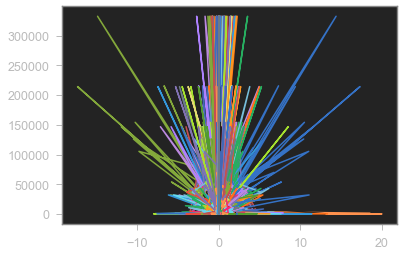

In [311]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(X_test,pred)
#plt.scatter(X_test,Y_test)
#because x has multiple variables, x,y must be of same size to plot line graph

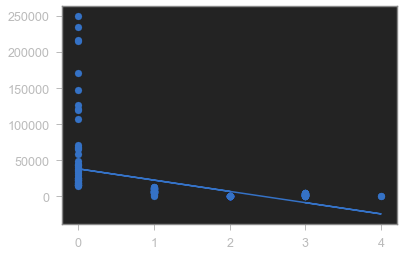

In [312]:
# for plotting

x1=df[['Cap Category']]
y1=df['MarketCap']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.25)
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(X_train,Y_train)
pred1=lr1.predict(X_test)
#print(pred1)
plt.scatter(X_test,Y_test)
plt.plot(X_test,pred1)